In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recentdate= session.query(func.max(Measurement.date)).first()

therecentdate=dt.datetime.strptime(recentdate[0], '%Y-%m-%d')
therecentdate

datetime.datetime(2017, 8, 23, 0, 0)

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(year=therecentdate.year - 1, month=therecentdate.month, day=therecentdate.day)
year_ago

# Perform a query to retrieve the data and precipitation scores

ayear= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date<=therecentdate).filter(Measurement.date>=year_ago)
# Save the query results as a Pandas DataFrame. Explicitly set the column names
ayear_df=pd.DataFrame(ayear,columns=['date','precipitation'])

# Sort the dataframe by date

ayear_df.sort_values('date',inplace=True)
ayear_df.reset_index(drop=True)



,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,NaN
2,2016-08-23,1.79
3,2016-08-23,0.05
4,2016-08-23,0.15
...,...,...
2225,2017-08-22,0.00
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


([<matplotlib.axis.XTick at 0x1d9599b6980>,
 [Text(0.0, 0, '2016-08-23'),
  Text(87.0, 0, '2016-11-18'),
  Text(175.0, 0, '2017-02-14'),
  Text(267.0, 0, '2017-05-17'),
  Text(365.0, 0, '2017-08-23')])

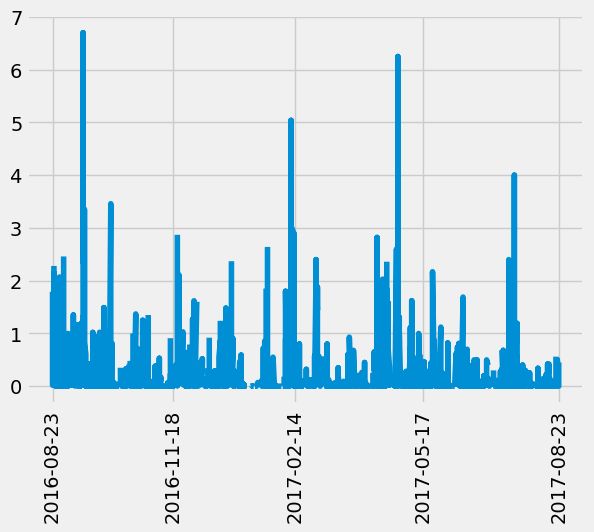

In [31]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.plot(ayear_df['date'],ayear_df['precipitation'])

num_dates = len(ayear_df['date'])
step = num_dates // 4  

plt.xticks(ayear_df['date'][::step], labels=[date for date in ayear_df['date'][::step]], rotation=90)


In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
ayear_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

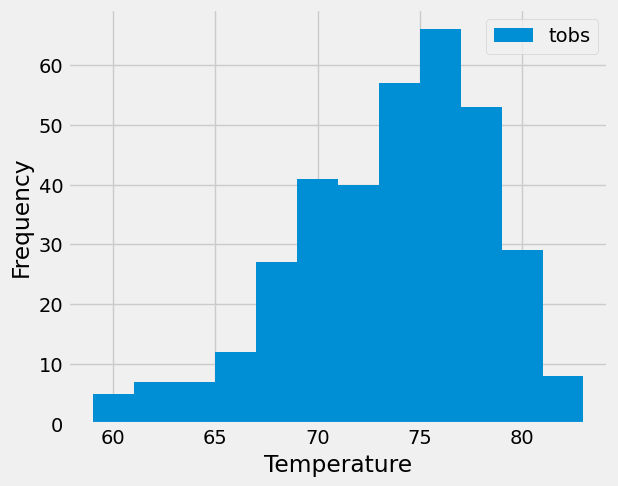

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()